# Customer Segmentation Using Clustering Algorithms



> This project applies clustering techniques (K-Means, Agglomerative Clustering) to segment wholesale customers based on their purchasing behaviors. It utilizes data preprocessing, feature scaling, and transformation to enhance clustering performance and evaluates models using silhouette scores and inertia metrics.



In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.model_selection import ParameterGrid

In [3]:
df = pd.read_csv('Wholesale-customers-data.csv', sep=',', header=0)

<Axes: >

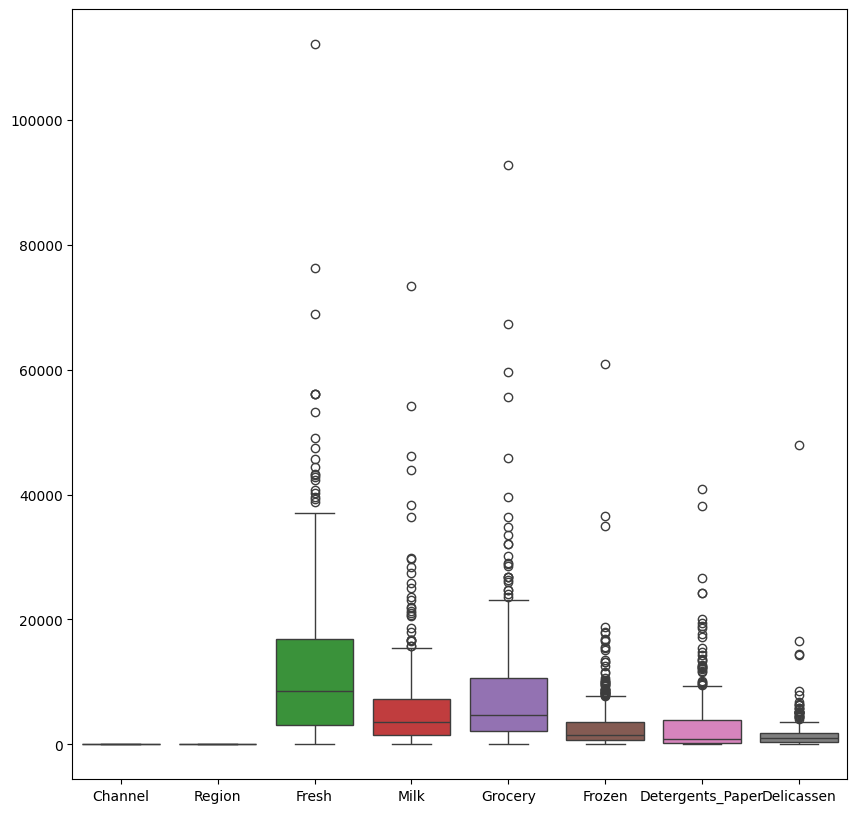

In [4]:
plt.figure(figsize=(10,10))
sns.boxplot(df)

<Figure size 1000x1000 with 0 Axes>

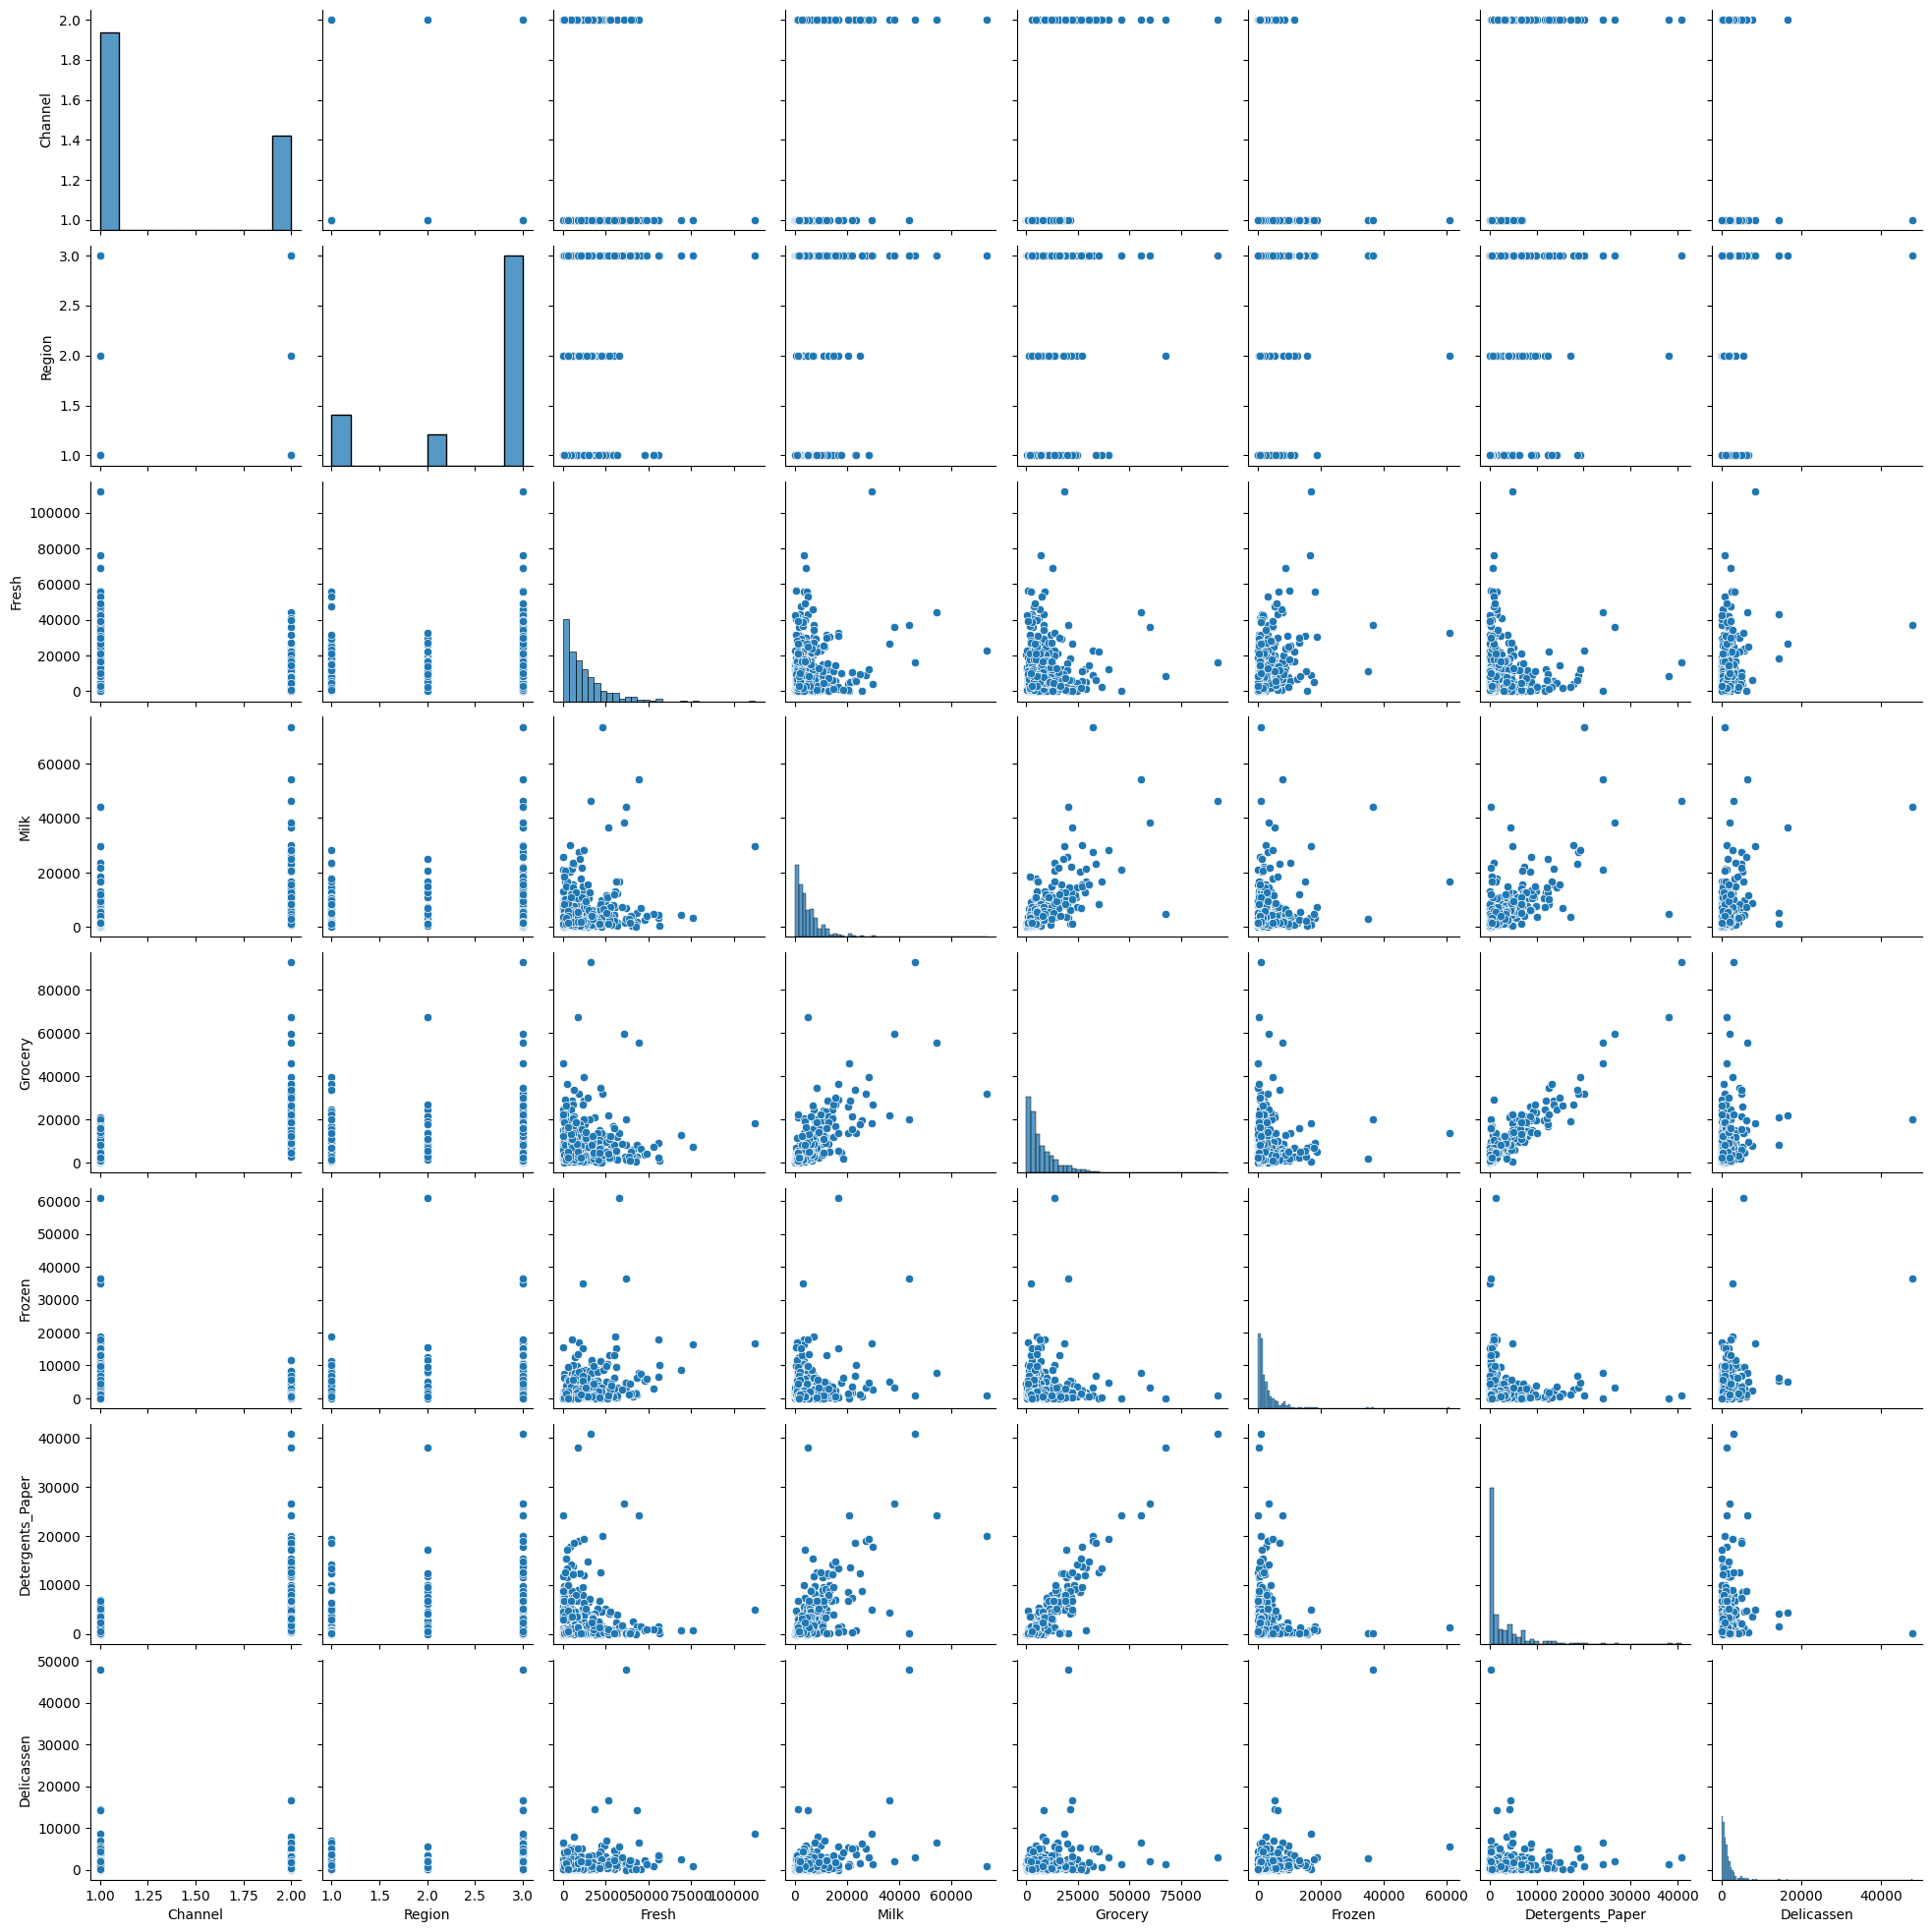

In [5]:
plt.figure(figsize=(10,10))
sns.pairplot(df)

In [6]:
dropped_columns = df[['Channel','Region']]
remain_columns = df.drop(columns=['Channel','Region'])
remain_columns_header = remain_columns.columns.tolist()
pt = PowerTransformer()
remain_columns = pd.DataFrame(pt.fit_transform(remain_columns), columns=remain_columns_header)
scaler = MinMaxScaler()
remain_columns = pd.DataFrame(scaler.fit_transform(remain_columns), columns=remain_columns_header)
df = pd.concat([dropped_columns,remain_columns], axis=1)

<Axes: >

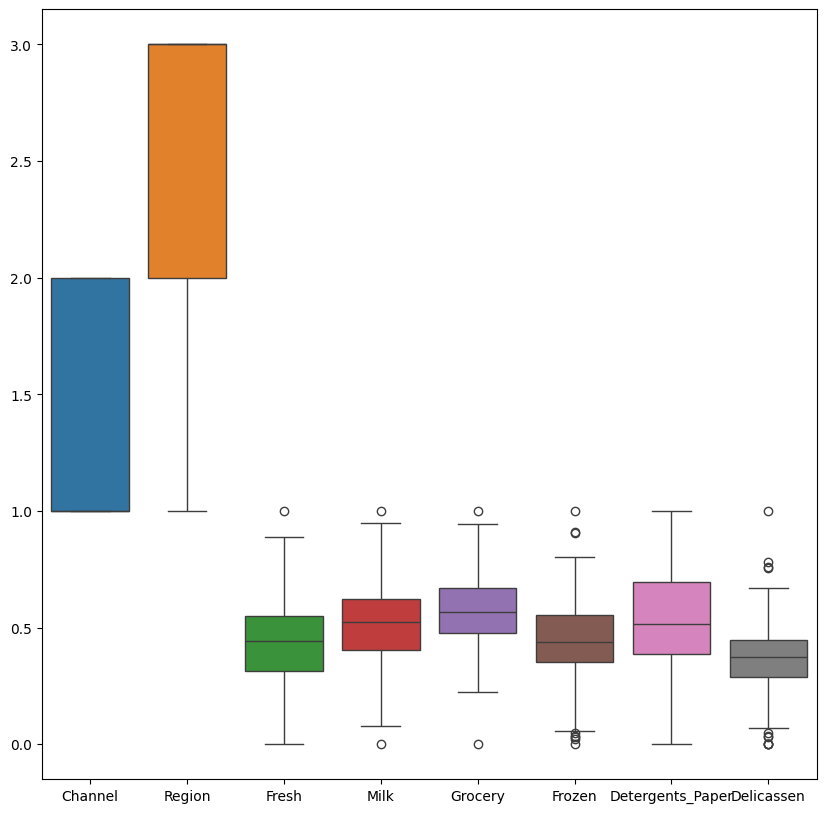

In [7]:
plt.figure(figsize=(10,10))
sns.boxplot(df)

In [8]:
random_state = 42
inertia = []
silhouette_scores = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=random_state)
    labels = kmeans.fit_predict(df)  # Store cluster labels separately
    inertia.append(kmeans.inertia_)  # Access inertia from the trained model
    silhouette_scores.append(silhouette_score(df, labels))  # Compute silhouette score

In [9]:
inertiaDF = pd.DataFrame({'n_cluster': range(2, 11), 'inertia': inertia})
silhouetteDF = pd.DataFrame({'n_cluster': range(2, 11), 'silhouette_score': silhouette_scores})

<Axes: xlabel='n_cluster', ylabel='silhouette_score'>

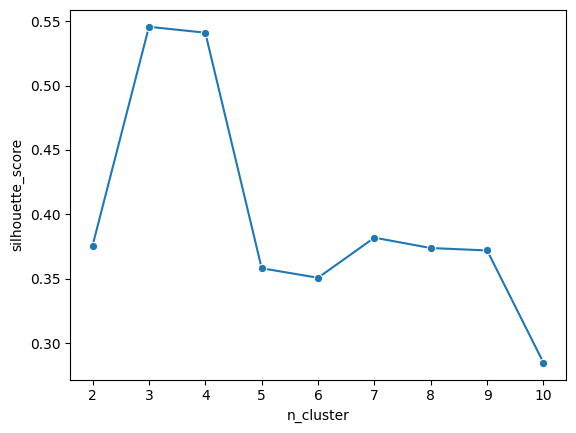

In [10]:
sns.lineplot(silhouetteDF, x="n_cluster", y="silhouette_score", marker="o")


<Axes: xlabel='n_cluster', ylabel='inertia'>

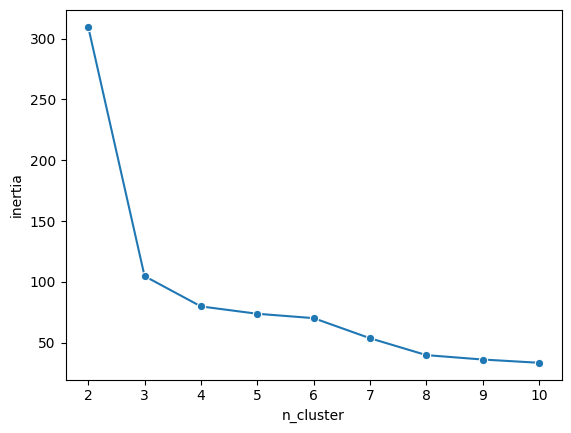

In [11]:
sns.lineplot(inertiaDF, x="n_cluster", y="inertia", marker="o")

In [12]:
kmeans = KMeans(n_clusters=4,random_state=random_state)
labels = kmeans.fit_predict(df)

([<matplotlib.patches.Wedge at 0x7a8cd4cec2d0>,
 [Text(0.7023759884602186, 0.8465624435530619, '0'),
  Text(-0.7379871298437355, 0.8157052140234274, '1'),
  Text(-0.3770421179076863, -1.033363073330805, '2'),
  Text(1.0765036056390154, -0.22614151995199683, '3')])

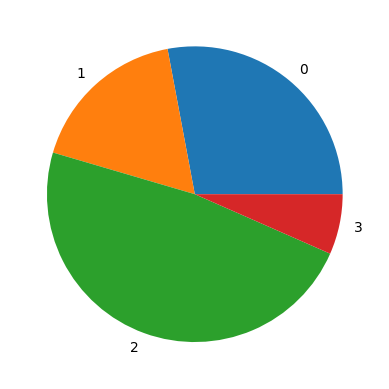

In [14]:
kmeans_cluster_counts = np.bincount(labels)
plt.pie(kmeans_cluster_counts, labels=[*range(4)])

In [15]:
params = {'linkage': ['ward', 'complete', 'average', 'single'], 'n_cluster': [*range(2,11)]}
silhouette_scores = []
inertia = []
results = pd.DataFrame(columns=['n_cluster', 'linkage', 'silhouette score'])

In [16]:
for n in params['n_cluster']:
  for linkage in params['linkage']:
    clustering = AgglomerativeClustering(n_clusters=n, linkage=linkage)
    lbls = clustering.fit_predict(df)
    results.loc[len(results)]= [n,linkage,silhouette_score(df, labels=lbls)]

In [17]:
results.sort_values(by=['silhouette score'], ascending=False)

,n_cluster,linkage,silhouette score
18,6,average,0.605976
19,6,single,0.605976
16,6,ward,0.605976
23,7,single,0.594742
12,5,ward,0.587676
14,5,average,0.587676
22,7,average,0.572522
17,6,complete,0.571076
15,5,single,0.569397
27,8,single,0.568413


In [20]:
results.loc[8]

,8
n_cluster,4
linkage,ward
silhouette score,0.564271


([<matplotlib.patches.Wedge at 0x7a8cd2ab3b90>,
 [Text(0.8945124151645788, 0.6401933607250488, '0'),
  Text(0.07063715566814605, 1.0977296535300092, '1'),
  Text(-0.8945124451341918, 0.6401933188498999, '2'),
  Text(0.07063718136236288, -1.097729651876627, '3')])

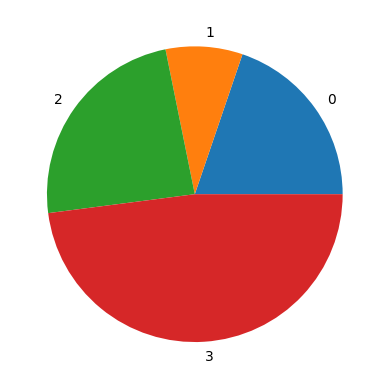

In [19]:
agglomerative_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
lbls = agglomerative_clustering.fit_predict(df)
agglomerative_clustering_counts = np.bincount(lbls)
plt.pie(agglomerative_clustering_counts, labels=[*range(4)])